<a href="https://colab.research.google.com/github/ShivrudraSwami/Railway-Track-Defect-Detection-System/blob/main/Railway_Track_Defect_Detection_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow
!pip install opencv-python

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import os
# import cv2
# import numpy as np

# # Define paths
# train_path = "/content/drive/MyDrive/Dataset_1/Train"
# # test_path = "/content/drive/MyDrive/Dataset_1/Test"

# # Define image size
# IMG_SIZE = (224, 224)  # Resize images to 224x224 pixels

# # Function to load images manually
# def load_images_from_folder(folder_path):
#     images = []
#     labels = []
#     for label, class_name in enumerate(["Non Defective","Crack","Head checks","Missing Bolt","Missing Hook","Break out","Corrugations","Indentations","Skid Spots"]):
#         class_path = os.path.join(folder_path, class_name)
#         for filename in os.listdir(class_path):
#             img_path = os.path.join(class_path, filename)
#             img = cv2.imread(img_path)  # Read image
#             img = cv2.resize(img, IMG_SIZE)  # Resize to match model input
#             img = img / 255.0  # Normalize pixel values (0 to 1)
#             images.append(img)
#             labels.append(class_name)  # 1 for defective, 0 for non-defective
#     return np.array(images), np.array(labels)

# # Load dataset
# X_train, y_train = load_images_from_folder(train_path)
# X_test, y_test = load_images_from_folder(test_path)

# print(f"Training data shape: {X_train.shape}, Labels shape: {y_train.shape}")
# print(f"Test data shape: {X_test.shape}, Labels shape: {y_test.shape}")

# # Save for future use
# np.save("X_train.npy", X_train)
# np.save("y_train.npy", y_train)
# np.save("X_test.npy", X_test)
# np.save("y_test.npy", y_test)

# print("Dataset saved as NumPy arrays!")

In [ ]:
X_train = np.load("/content/drive/MyDrive/ML_project/X_train.npy")
y_train = np.load("/content/drive/MyDrive/ML_project/y_train.npy")
X_test = np.load("/content/drive/MyDrive/ML_project/X_test.npy")
y_test = np.load("/content/drive/MyDrive/ML_project/y_test.npy")
# ✅ Define your specific classes
classes = ["Non Defective", "Crack", "Head checks", "Missing Bolt",
           "Missing Hook", "Break out", "Corrugations", "Indentations", "Skid Spots", "Squats"]

# ✅ One-Hot Encode the String Labels
encoder = OneHotEncoder(categories=[classes], sparse_output=False)

# Reshape labels to 2D array for encoding
y_train_reshaped = y_train.reshape(-1, 1)
y_test_reshaped = y_test.reshape(-1, 1)

y_train_encoded = encoder.fit_transform(y_train_reshaped)
y_test_encoded = encoder.transform(y_test_reshaped)

print(f"Training data shape: {X_train.shape}, Labels shape: {y_train.shape}")
print(f"Test data shape: {X_test.shape}, Labels shape: {y_test.shape}")
print("Sample One-Hot Encoded Labels (train):", y_train_encoded[:5])
print("Classes:", encoder.categories_)


Training data shape: (1846, 224, 224, 3), Labels shape: (1846,)
Test data shape: (107, 224, 224, 3), Labels shape: (107,)
Sample One-Hot Encoded Labels (train): [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Classes: [array(['Non Defective', 'Crack', 'Head checks', 'Missing Bolt',
       'Missing Hook', 'Break out', 'Corrugations', 'Indentations',
       'Skid Spots', 'Squats'], dtype=object)]


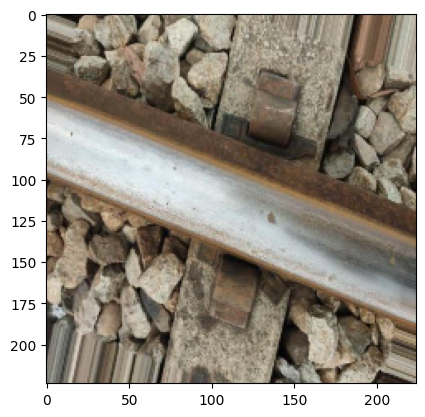

Indentations


In [ ]:
import matplotlib.pyplot as plt

# Reshape the image data to 28x28
image = X_train[1533]  # Reshape to 28x28 for MNIST

plt.imshow(image) # Display the image using grayscale colormap
plt.show()

# print the corresponding label
print(y_train[1533])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 67s 2s/step - accuracy: 0.1989 - loss: 47.5038 - val_accuracy: 0.1869 - val_loss: 6.5430
Epoch 2/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 0.2562 - loss: 4.6446 - val_accuracy: 0.2523 - val_loss: 1.9814
Epoch 3/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.2640 - loss: 2.0719 - val_accuracy: 0.2523 - val_loss: 1.9991
Epoch 4/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.3047 - loss: 1.9215 - val_accuracy: 0.3178 - val_loss: 1.7937
Epoch 5/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 0.3170 - loss: 2.0405 - val_accuracy: 0.3364 - val_loss: 1.8552
Epoch 6/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.3222 - loss: 1.9613 - val_accuracy: 0.4019 - val_loss: 1.7951
Epoch 7/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 87s 2s/step - accuracy: 0.3495 - loss: 1.8102 - val_accuracy: 0.2617 - val_loss: 1.8409
Epoch 8/15
29/29 ━━━━━━━━━━━━━━━━━━━━ 66s 2s/step - accuracy: 0.3400 - loss: 1.8335 - val_accuracy: 0.3645 - val_loss

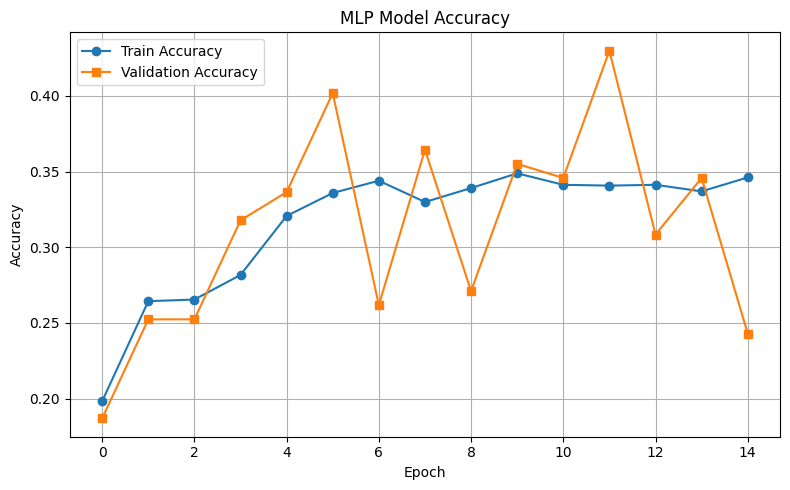

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam

# Flatten the image data for MLP input
X_train_flat = X_train.reshape((X_train.shape[0], -1))
X_test_flat = X_test.reshape((X_test.shape[0], -1))

# Define the MLP model
model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train_flat.shape[1],)),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dense(len(classes), activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
EPOCHS = 15
BATCH_SIZE = 64

history = model.fit(
    X_train_flat, y_train_encoded,
    validation_data=(X_test_flat, y_test_encoded),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1
)

# Plot training and validation accuracy
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='s')
plt.title('MLP Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Save the model
model.save("/content/drive/MyDrive/ML_project/mlp_railway_fault_classifier.h5")


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 25s 236ms/step - accuracy: 0.2735 - loss: 2.0834 - val_accuracy: 0.4673 - val_loss: 1.5697
Epoch 2/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.5633 - loss: 1.2981 - val_accuracy: 0.5888 - val_loss: 1.2523
Epoch 3/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.6988 - loss: 0.9451 - val_accuracy: 0.6729 - val_loss: 1.1256
Epoch 4/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.7505 - loss: 0.8000 - val_accuracy: 0.6916 - val_loss: 0.9952
Epoch 5/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.7985 - loss: 0.6471 - val_accuracy: 0.6542 - val_loss: 0.9146
Epoch 6/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.8276 - loss: 0.5484 - val_accuracy: 0.7009 - val_loss: 0.9140
Epoch 7/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.8800 - loss: 0.4493 - val_accuracy: 0.7009 - val_loss: 0.8751
Epoch 8/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accurac

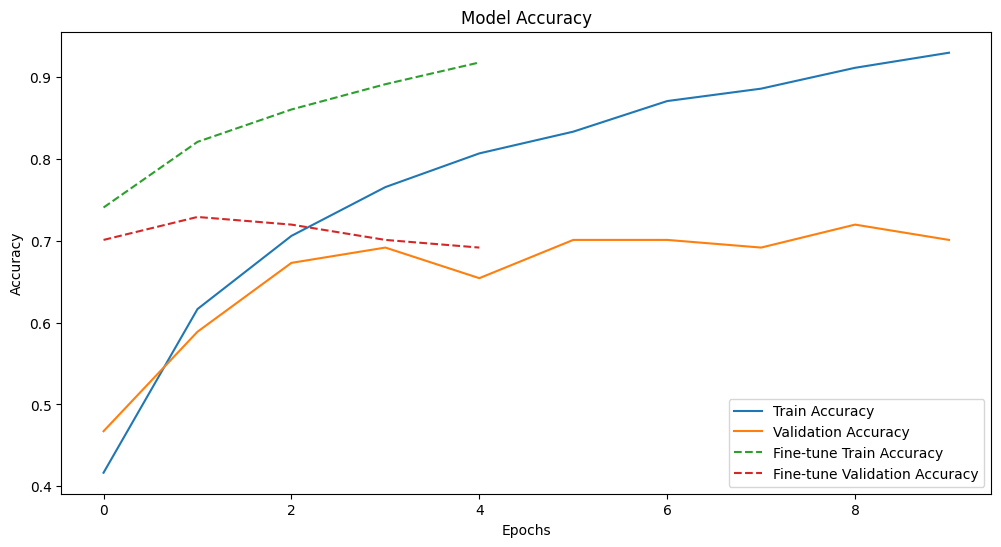

In [ ]:
# Code block to train and test Custom MobileNet based CNN model after data preprocessing

# Define image size and batch size
IMG_SIZE = (224, 224, 3)    # Updated image size
BATCH_SIZE = 32           # Batch size

# Load MobileNetV2 with pre-trained weights
base_model = MobileNetV2(input_shape=IMG_SIZE, include_top=False, weights="imagenet")
base_model.trainable = False  # Freeze base layers initially

# Add Custom Layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
output_layer = Dense(len(classes), activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output_layer)

# Compile Model with Categorical Cross-Entropy
model.compile(optimizer=Adam(learning_rate=0.0001), loss="categorical_crossentropy", metrics=["accuracy"])

# Train the Model
EPOCHS = 10
history = model.fit(X_train, y_train_encoded, validation_data=(X_test, y_test_encoded), batch_size=BATCH_SIZE, epochs=EPOCHS)

# Unfreeze Base Layers and Fine-Tune
base_model.trainable = True
for layer in base_model.layers[:100]:  # Keep initial layers frozen
    layer.trainable = False

model.compile(optimizer=Adam(learning_rate=0.00001), loss="categorical_crossentropy", metrics=["accuracy"])

# Fine-Tuning
FINE_TUNE_EPOCHS = 5
history_fine = model.fit(X_train, y_train_encoded, validation_data=(X_test, y_test_encoded), batch_size=BATCH_SIZE, epochs=FINE_TUNE_EPOCHS)

# Save the trained model
model.save("/content/drive/MyDrive/ML_project/railway_fault_detector_v2.h5")

# Plot training results
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history_fine.history['accuracy'], label='Fine-tune Train Accuracy', linestyle='dashed')
plt.plot(history_fine.history['val_accuracy'], label='Fine-tune Validation Accuracy', linestyle='dashed')
plt.legend()
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()


In [ ]:
# Code block for image prediction using model, modify preprocessing step as per connection with GUI

import tensorflow as tf
import numpy as np
import cv2

# Load the trained model
model = tf.keras.models.load_model("/content/drive/MyDrive/ML_project/railway_fault_detector_v2.h5")

# Define class labels (adjust based on your dataset)
class_labels = ["Non Defective","Crack","Head checks","Missing Bolt","Missing Hook","Break out","Corrugations","Indentations","Skid Spots", "Squats"]

# Function to preprocess input image
def preprocess_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.resize(image, (224, 224))
    image = image / 255.0  # Normalize
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    return image

# Run inference on a test image
image_path = "test_image.jpg"
image = preprocess_image(image_path)
prediction = model.predict(image)
predicted_class = class_labels[np.argmax(prediction)]

print(f"Predicted Fault Type: {predicted_class}")


Epoch 1/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 357s 6s/step - accuracy: 0.3089 - loss: 6.5474 - val_accuracy: 0.0374 - val_loss: 38.4099
Epoch 2/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 373s 6s/step - accuracy: 0.4324 - loss: 1.9463 - val_accuracy: 0.0374 - val_loss: 40.7329
Epoch 3/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 380s 6s/step - accuracy: 0.5018 - loss: 1.7204 - val_accuracy: 0.0093 - val_loss: 19.2889
Epoch 4/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 383s 6s/step - accuracy: 0.5132 - loss: 1.6619 - val_accuracy: 0.2243 - val_loss: 9.5863
Epoch 5/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 338s 6s/step - accuracy: 0.5237 - loss: 1.6626 - val_accuracy: 0.2804 - val_loss: 8.2435
Epoch 6/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 340s 6s/step - accuracy: 0.5643 - loss: 1.5462 - val_accuracy: 0.3458 - val_loss: 2.7507
Epoch 7/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 339s 6s/step - accuracy: 0.5673 - loss: 1.4113 - val_accuracy: 0.5327 - val_loss: 2.3373
Epoch 8/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 381s 6s/step - accuracy: 0.5655 - loss: 1.3068 - val_accuracy: 0.6075 

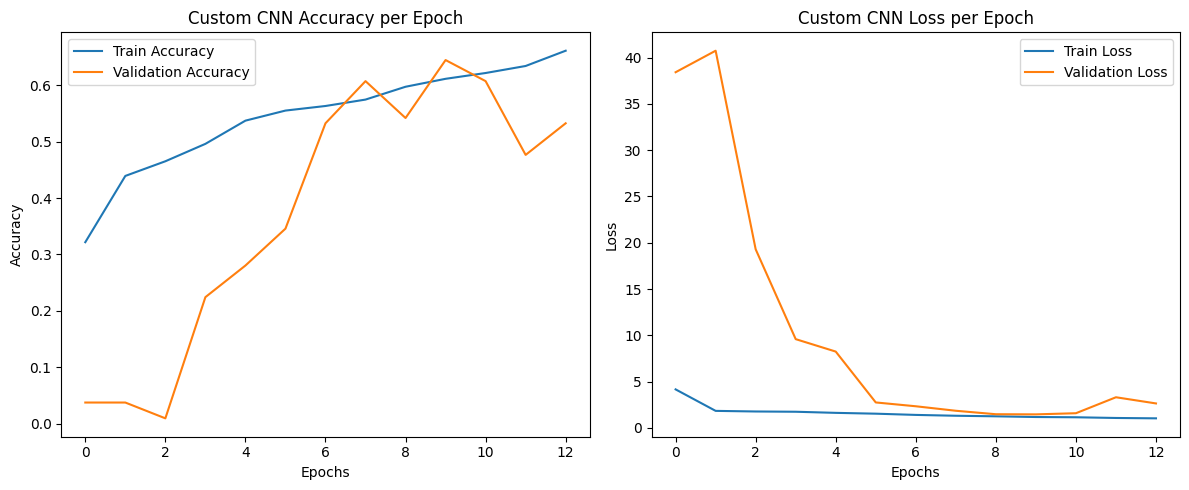

In [ ]:
#Code block for 3-layered custom CNN model with Dropout and BatchNormalization to prevent overfitting

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Define model input shape
IMG_SIZE = (224, 224, 3)
NUM_CLASSES = len(classes)
BATCH_SIZE = 32
EPOCHS = 20

# Build the Custom CNN
model_cnn = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=IMG_SIZE),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(NUM_CLASSES, activation='softmax')
])

# Compile the model
model_cnn.compile(optimizer=Adam(learning_rate=0.0005),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Early stopping for stability
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history_cnn = model_cnn.fit(
    X_train, y_train_encoded,
    validation_data=(X_test, y_test_encoded),
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stop]
)

# Save the model
model_cnn.save("/content/drive/MyDrive/ML_project/custom_cnn_model.h5")

# Plot Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_cnn.history['accuracy'], label='Train Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Validation Accuracy')
plt.title('Custom CNN Accuracy per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history_cnn.history['loss'], label='Train Loss')
plt.plot(history_cnn.history['val_loss'], label='Validation Loss')
plt.title('Custom CNN Loss per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
#Code block for 8-layered custom CNN model with Dropout and BatchNormalization to prevent overfitting

# =============================================================================
# Import Libraries
# =============================================================================
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, BatchNormalization, Flatten, Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import OneHotEncoder
from collections import Counter
import os

# =============================================================================
# Hyperparameters
# =============================================================================

IMG_SIZE = (224, 224, 3)
EPOCH = 30

# =============================================================================
# Model Architecture - Deep Custom CNN ( 8 Layers )
# =============================================================================
model = Sequential()


# Block 1
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=IMG_SIZE))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Block 2
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Block 3
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

# Block 4
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

# Dense layers
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(classes), activation='softmax'))

# =============================================================================
# Compile Model
# =============================================================================
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# =============================================================================
# Callbacks
# =============================================================================
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    verbose=1
)

# =============================================================================
# Train the Model
# =============================================================================
history = model.fit(
    X_train, y_train_encoded,
    validation_data=(X_test, y_test_encoded),
    batch_size=32,
    epochs=EPOCH,
    callbacks=[reduce_lr],
    verbose=1
)

# =============================================================================
# Save Final Trained Model (after all epochs, only once)
# =============================================================================
model.save("final_8_layered_custom_cnn_model.h5")
print("✅ Final trained model saved successfully as .h5")

# =============================================================================
# Evaluate the Model
# =============================================================================
loss, acc = model.evaluate(X_test, y_test_encoded, verbose=0)
print(f"\n✅ Final Accuracy: {acc:.4f}, Loss: {loss:.4f}")

# =============================================================================
# Plot Training History
# =============================================================================
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='s')
plt.title('Accuracy per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='s')
plt.title('Loss per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# Code block for image prediction using Custom 8 Layers CNN model
import tensorflow as tf
from tensorflow.keras.models import load_model
import numpy as np
import cv2

# Load model
MODEL_PATH = "/content/drive/MyDrive/ML_project/final_8_layered_custom_cnn_model.h5"
model = load_model(MODEL_PATH)

# Class labels
class_labels = [
    "Non Defective", "Crack", "Head checks", "Missing Bolt",
    "Missing Hook", "Break out", "Corrugations", "Indentations",
    "Skid Spots", "Squats"
]

# Preprocessing
def preprocess_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.resize(image, (224, 224))
    image = image.astype('float32')
    image = image / 255.0  # Normalize
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    return image

# Run inference on a test image
image_path = "/content/Screenshot 2025-04-21 111841.png"
image = preprocess_image(image_path)
prediction = model.predict(image)
predicted_class = class_labels[int(np.argmax(prediction))]

print(f"Predicted Fault Type: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
Predicted Fault Type: Crack


87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 43s 424ms/step - accuracy: 0.4081 - loss: 1.7512 - val_accuracy: 0.6168 - val_loss: 1.2951
Epoch 2/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 10s 68ms/step - accuracy: 0.7034 - loss: 0.9532 - val_accuracy: 0.7103 - val_loss: 0.9034
Epoch 3/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - accuracy: 0.8053 - loss: 0.6496 - val_accuracy: 0.7477 - val_loss: 0.7880
Epoch 4/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 71ms/step - accuracy: 0.8761 - loss: 0.4438 - val_accuracy: 0.7290 - val_loss: 0.7862
Epoch 5/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 69ms/step - accuracy: 0.9271 - loss: 0.2899 - val_accuracy: 0.7570 - val_loss: 0.9465
Epoch 6/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 69ms/step - accuracy: 0.9483 - loss: 0.2080 - val_accuracy: 0.7196 - val_loss: 0.9033
Epoch 7/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - accuracy: 0.9822 - loss: 0.1216 - val_accuracy: 0.7570 - val_loss: 0.8705
Epoch 8/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 69ms/step - accu

✅ Final trained model saved successfully as .h5


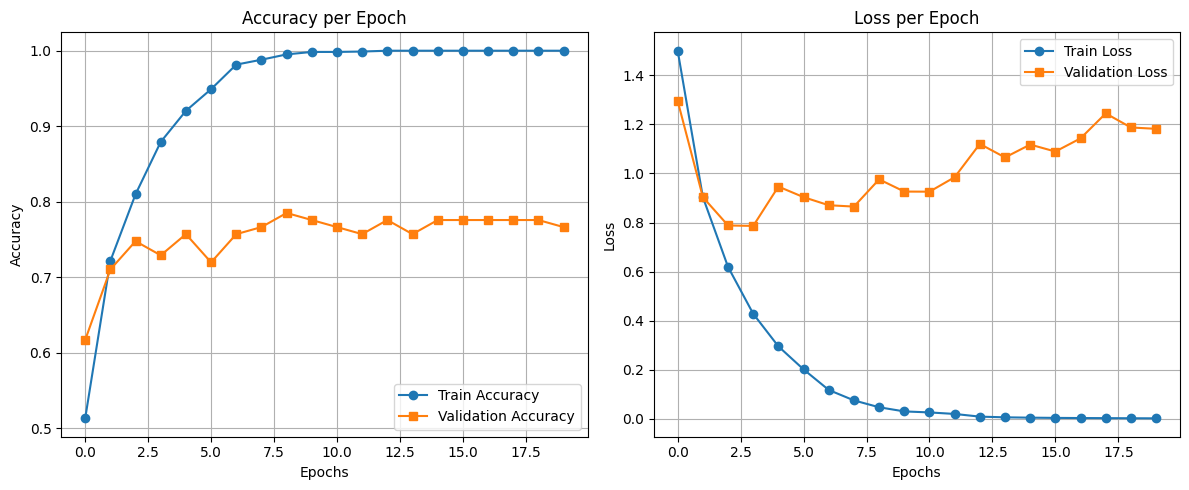

In [ ]:
# Code block to train and test Custom InceptionV3 based CNN model after data preprocessing

# =============================================================================
# Import Libraries
# =============================================================================
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.preprocessing import OneHotEncoder
import os

# =============================================================================
# Hyperparameters
# =============================================================================
IMG_SIZE = (224, 224, 3)
EPOCHS = 20  # Initial epochs
BATCH_SIZE = 32

# =============================================================================
# Load Pretrained EfficientNetB0
# =============================================================================
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=IMG_SIZE)
base_model.trainable = False  # Freeze layers initially

# =============================================================================
# Model Architecture - Using InceptionV3
# =============================================================================
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
output = Dense(len(classes), activation='softmax')(x)

# Final Model
model = Model(inputs=base_model.input, outputs=output)

# =============================================================================
# Compile Model
# =============================================================================
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# =============================================================================
# Callbacks
# =============================================================================
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    verbose=1
)

# =============================================================================
# Training and Fine Tuning of Model
# =============================================================================

history = model.fit(X_train, y_train_encoded, validation_data=(X_test, y_test_encoded), batch_size=BATCH_SIZE, epochs=EPOCHS)

# Unfreeze Base Layers and Fine-Tune
base_model.trainable = True
for layer in base_model.layers[:100]:  # Keep initial layers frozen
    layer.trainable = False

model.compile(optimizer=Adam(learning_rate=0.00001), loss="categorical_crossentropy", metrics=["accuracy"])

# Fine-Tuning
FINE_TUNE_EPOCHS = 10
history_fine = model.fit(X_train, y_train_encoded, validation_data=(X_test, y_test_encoded), batch_size=BATCH_SIZE, epochs=FINE_TUNE_EPOCHS)

# =============================================================================
# Save Final Trained Model
# =============================================================================
model.save("/content/drive/MyDrive/ML_project/final_trained_efficientnet_model.h5")
print("✅ Final trained model saved successfully as .h5")

# =============================================================================
# Plot Training History
# =============================================================================
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='s')
plt.title('Accuracy per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='s')
plt.title('Loss per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
